In [1]:
#import the dependencies
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load and prep the data
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

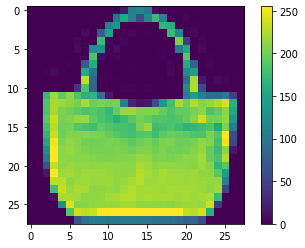

In [6]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

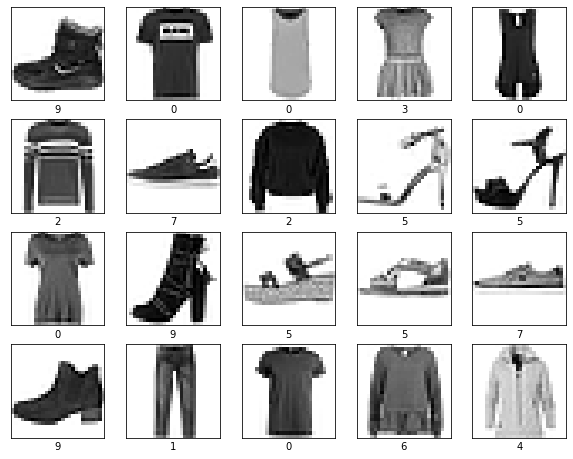

In [7]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [8]:
#reshape and normalise the images

In [9]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32')/255
test_images = test_images.reshape(-1,28, 28, 1).astype('float32')/255

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
test_images.shape

(10000, 28, 28, 1)

In [12]:
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

In [13]:
train_images = train_images[:-10000]
train_lables = train_labels[:-10000]

val_images = train_images[-10000:]
val_labels = train_labels[-10000:]

In [14]:
train_images.shape

(50000, 28, 28, 1)

In [15]:
train_lables.shape

(50000,)

In [16]:
val_images.shape

(10000, 28, 28, 1)

In [17]:
val_labels.shape

(10000,)

In [18]:
#building the model

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
             )

In [24]:
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

ValueError: Data cardinality is ambiguous:
  x sizes: 50000
  y sizes: 60000
Make sure all arrays contain the same number of samples.